In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
from matplotlib.patches import Circle

m = 1
g = 10
L = 0.3
dt = 0.005

t = np.arange(0,20, dt)
loc = np.zeros((len(t),2))
loc[0] = [np.pi,7]

Traceback (most recent call last):
  File "C:\Users\Pieter\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\Pieter\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Pieter\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


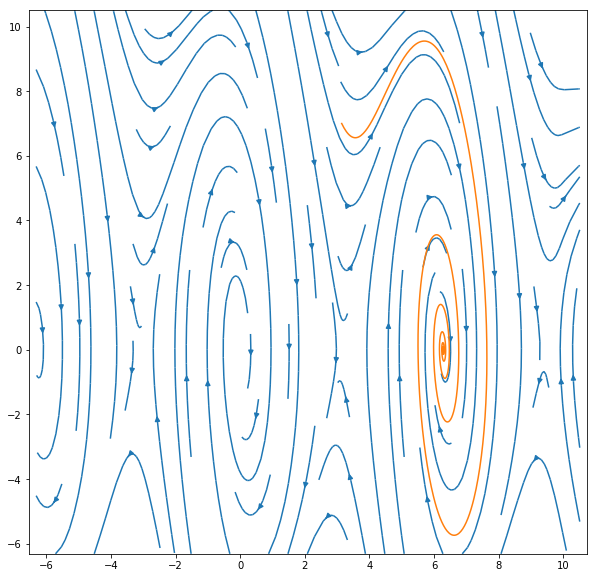

In [9]:
for i in range(len(t)-1):
    loc[i+1, 0] = loc[i, 0] + loc[i-1,1] * dt
    loc[i+1, 1] = loc[i, 1] +(- m*loc[i-1,1] - g/L * np.sin(loc[i,0]))*dt

a = np.min(loc)*1.1
b = np.max(loc)*1.1
c = (b-a)/30
y,x = np.mgrid[a:b:c,a:b:c]

X = y
Y = -m*y-g/L*np.sin(x)

%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = plt.subplot()
ax.axis('equal')

plt.streamplot(x,y,X,Y)
plt.plot(loc[:,0],loc[:,1])

plt.show()

In [10]:
yL = -L*np.cos(loc[:,0])
xL = L*np.sin(loc[:,0])

xdata = xL
ydata = yL

<IPython.core.display.Javascript object>


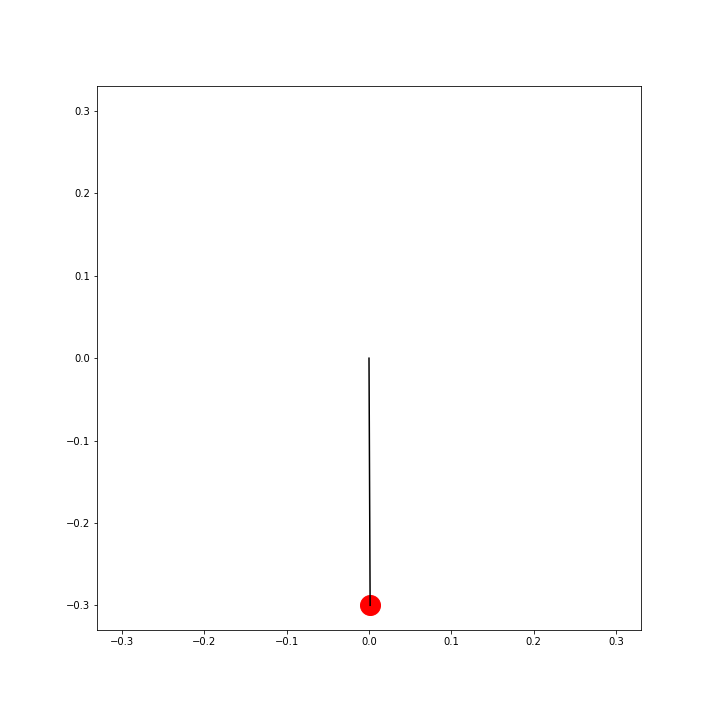

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, aspect='equal', xlim=(-L*1.1, L*1.1), ylim=(-L*1.1, L*1.1))

l1, = ax.plot([xL[0]],[yL[0]],'ro', markersize  =20)
l2, = ax.plot([0,xL[0]],[0,yL[0]],'k')

def inter(i):
    l1.set_data(xL[i], yL[i])
    l2.set_data([0,xL[i]], [0,yL[i]])
    return l1,

anim = animation.FuncAnimation(fig, inter, frames = len(t), interval = dt*1000, repeat = True)